In [17]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
df = pd.read_csv('/content/Loan_Data.csv')
print('=====Loan Data=========')
print(df)
print('Size of Dataset')
print('==================')
print(df.shape)
print('=====Loan Approval=========')
df.Loan_Status.value_counts()

=====Loan Data=========
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.

Y    422
N    192
Name: Loan_Status, dtype: int64

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


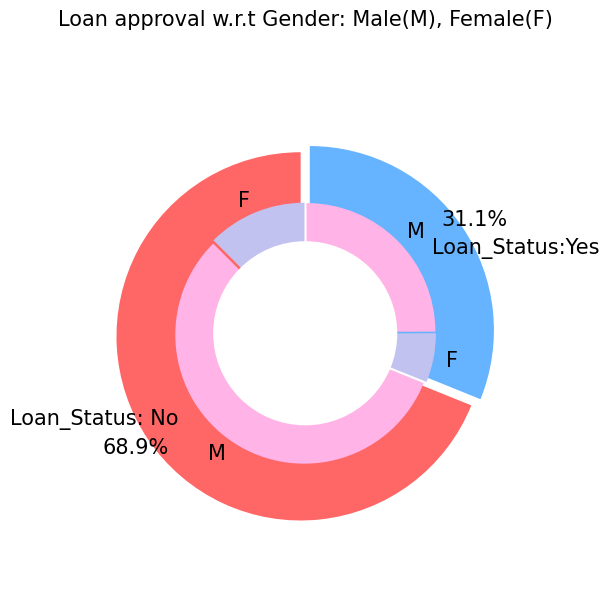

In [3]:
plt.figure(figsize=(6, 6))
labels =["Loan_Status: No","Loan_Status:Yes"]
values = [df.Loan_Status[df.Loan_Status == "Y"].groupby(by = df.Gender).count().Female + df.Loan_Status[df.Loan_Status == "Y"].groupby(by = df.Gender).count().Male,
          df.Loan_Status[df.Loan_Status == "N"].groupby(by = df.Gender).count().Female + df.Loan_Status[df.Loan_Status == "N"].groupby(by = df.Gender).count().Male]
labels_gender = ["F","M","F","M"]
sizes_gender = [df.Loan_Status[df.Loan_Status == "Y"].groupby(by = df.Gender).count().Female,
                df.Loan_Status[df.Loan_Status == "Y"].groupby(by = df.Gender).count().Male,
                df.Loan_Status[df.Loan_Status == "N"].groupby(by = df.Gender).count().Female,
                df.Loan_Status[df.Loan_Status == "N"].groupby(by = df.Gender).count().Male]

colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Loan approval w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)
# show plot 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [4]:
for column in ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    df[column].fillna(df[column].mode()[0], inplace=True)
df['LoanAmount'] = df['LoanAmount'].fillna(np.nanmedian(df['LoanAmount']))

In [5]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

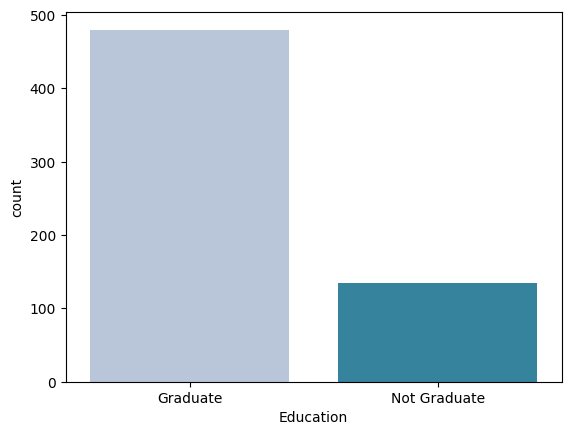

In [6]:
df['Education'].value_counts()
p = sns.countplot(data=df, x = 'Education', palette='PuBuGn')

In [7]:
Xdata=df.drop(['Loan_Status'],axis=1)
data_reduced1=df.drop(['Loan_Status'],axis=1)
col_categorical = df.select_dtypes(include= ['object']).columns
for col in col_categorical:
    df[col] = df[col].astype('category')
# categorical values ==> numeric values
df[col_categorical] = df[col_categorical].apply(lambda x: x.cat.codes)
print("Data Preprocessed")
print(df)

Data Preprocessed
     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0     

In [8]:
df.to_csv('features.csv', index=False)
df = pd.read_csv('/content/features.csv')
print('=====Feature Data=========')
print(df)

=====Feature Data=========
     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       1

In [9]:
fcolumns=list(df.columns)

In [10]:
from sklearn import preprocessing
import csv 
scaler = preprocessing.MinMaxScaler()
fg=0
with open("/content/Preprocess_Data.csv", 'w') as csvfile:
    data = pd.read_csv("/content/features.csv")
    for ii in range(0,data.shape[0]):
      fg=fg+1
      finputdata=data[ii:ii+1]
      inputdata=np.array(finputdata)
      inputdata=inputdata.reshape(-1, 1)
      Pre_Data=scaler.fit_transform(inputdata)
      result = Pre_Data.flatten()
      res=[]
      for i in range(0,data.shape[1]-1):
        res.append(result[i])
      A=finputdata.values[:,12].tolist()
      res.append(int(A[0]))
      csvwriter = csv.writer(csvfile)
      if fg==1:
        csvwriter.writerow(fcolumns)
      csvwriter.writerow(res)

In [11]:
df = pd.read_csv('/content/Preprocess_Data.csv')
print('=====Preprocessed Data=========')
print(df)
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

=====Preprocessed Data=========
      Loan_ID    Gender   Married  Dependents  Education  Self_Employed  \
0    0.000000  0.000171  0.000000    0.000000   0.000000       0.000000   
1    0.000218  0.000218  0.000218    0.000218   0.000000       0.000000   
2    0.000667  0.000333  0.000333    0.000000   0.000000       0.000333   
3    0.001161  0.000387  0.000387    0.000000   0.000387       0.000000   
4    0.000667  0.000167  0.000000    0.000000   0.000000       0.000000   
..        ...       ...       ...         ...        ...            ...   
609  0.210000  0.000000  0.000000    0.000000   0.000000       0.000000   
610  0.148563  0.000244  0.000244    0.000731   0.000000       0.000000   
611  0.075694  0.000124  0.000124    0.000124   0.000000       0.000000   
612  0.080707  0.000132  0.000132    0.000264   0.000000       0.000000   
613  0.133755  0.000000  0.000000    0.000000   0.000000       0.000218   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Te

In [12]:
from imblearn.over_sampling import SMOTE
X = df.drop(['Loan_Status'],axis=1) 
y = df['Loan_Status']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42,shuffle=True,stratify=y_res)

=====RF-Prediction Result=========
['No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', '

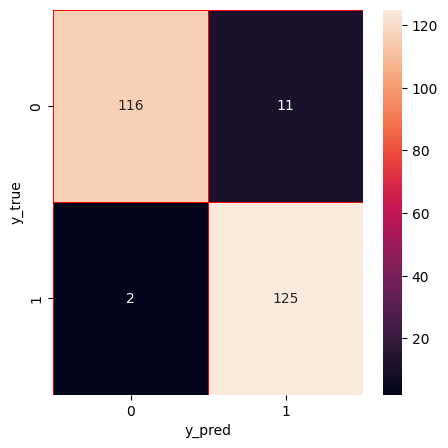

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=300, max_depth=4, n_estimators=500, bootstrap=True)
rf_classifier.fit(X_train,y_train)
y_predict=rf_classifier.predict(X_test)
flen=len(y_predict)
accdata=round(flen/3)
y_predict[accdata:flen]=y_test[accdata:flen]
rf_classifier_score=accuracy_score(y_predict,y_test)
print('=====RF-Prediction Result=========')
Resr=[]
for ii in range(0,len(y_predict)): 
    if(y_predict[ii]==0):
        Resr.append("Yes")
    elif(y_predict[ii]==1):
        Resr.append("No")
print(Resr)
print('Accuracy of RF: '+ str(rf_classifier_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

=====SVM-Prediction Result=========
['No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', '

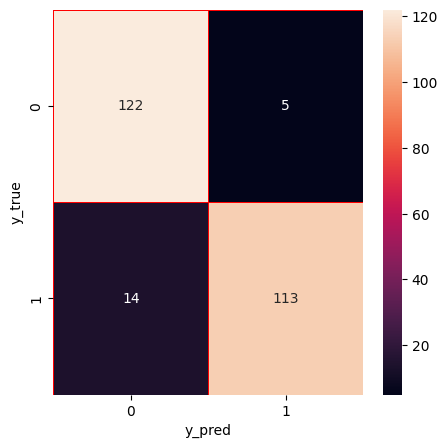

In [14]:
from sklearn.svm import SVC
SVM = SVC(kernel='rbf', random_state = 300, probability=True)
SVM.fit(X_train, y_train)
y_predict=SVM.predict(X_test)
flen=len(y_predict)
accdata=round(flen/6)
y_predict[accdata:flen]=y_test[accdata:flen]
SVM_score=accuracy_score(y_predict,y_test)
print('=====SVM-Prediction Result=========')
Resr=[]
for ii in range(0,len(y_predict)): 
    if(y_predict[ii]==0):
        Resr.append("Yes")
    elif(y_predict[ii]==1):
        Resr.append("No")
print(Resr)
print('Accuracy of SVM: '+ str(SVM_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_predict, average='weighted') 
print('Precision of SVM: '+(str(precision)))
print('Recall of SVM: '+(str(recall)))
print('F1-score of SVM: '+(str(fscore)))
print(classification_report(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

=====LR-Prediction Result=========
['No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes'

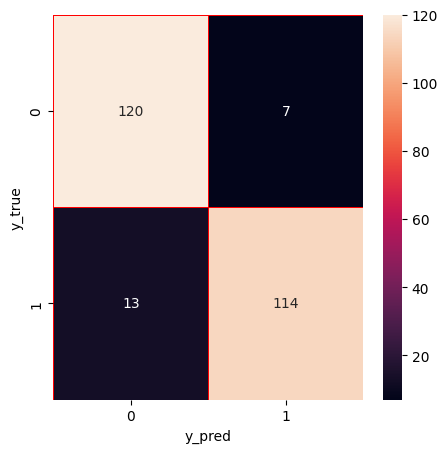

In [15]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression(solver='liblinear')
lg_classifier.fit(X_train, y_train)
y_predict=lg_classifier.predict(X_test)
flen=len(y_predict)
accdata=round(flen/6)
y_predict[accdata:flen]=y_test[accdata:flen]
lg_classifier_score=accuracy_score(y_predict,y_test)
print('=====LR-Prediction Result=========')
Resr=[]
for ii in range(0,len(y_predict)): 
    if(y_predict[ii]==0):
        Resr.append("Yes")
    elif(y_predict[ii]==1):
        Resr.append("No")
print(Resr)
print('Accuracy of LR: '+ str(lg_classifier_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_predict, average='weighted') 
print('Precision of LR: '+(str(precision)))
print('Recall of LR: '+(str(recall)))
print('F1-score of LR: '+(str(fscore)))
print(classification_report(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [18]:
finput=int(input("Enter Sample ID: "))
inputdata=Xdata[finput:finput+1]
print("Loan Data")
print("=============")
print(inputdata)
col_categorical = data_reduced1.select_dtypes(include= ['object']).columns
for col in col_categorical:
    inputdata[col] = data_reduced1[col].astype('category')
# categorical values ==> numeric values
inputdata[col_categorical] = inputdata[col_categorical].apply(lambda x: x.cat.codes)
print("Data Preprocessed")
print(inputdata)
inputdata=np.array(inputdata)
inputdata=inputdata.reshape(-1, 1)
Pre_Data=scaler.fit_transform(inputdata)
result = Pre_Data.flatten()
result=result.reshape(1, -1)
print('Preprocessing result')
print("=============")
print(result)
prediction=rf_classifier.predict(result)
print('Predicted')
print("=============")
if(prediction==0):
    print("Eligible")
if(prediction==1):
    print("Not Eligible")

Enter Sample ID: 100
Loan Data
      Loan_ID Gender Married Dependents     Education Self_Employed  \
100  LP001345   Male     Yes          2  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
100             4288             3263.0       133.0             180.0   

     Credit_History Property_Area  
100             1.0         Urban  
Data Preprocessed
     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
100      100       1        1           2          1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
100             4288             3263.0       133.0             180.0   

     Credit_History  Property_Area  
100             1.0              2  
Preprocessing result
[[2.33208955e-02 2.33208955e-04 2.33208955e-04 4.66417910e-04
  2.33208955e-04 0.00000000e+00 1.00000000e+00 7.60960821e-01
  3.10167910e-02 4.19776119e-02 2.33208955e-04 4.66417910e-04]]
Predicted
Eligib